<a href="https://colab.research.google.com/github/Teasotea/IASA_IntellectualDecisionSupportSystems/blob/main/lab1/ISPPR_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Варіант 20

## Хiд виконання роботи

Написати програму, яка реалiзує алгоритм градiєнтного спуску:

1. Розглянути функцію вартості

$$ E(w) = \frac{1}{2} \sigma^2 - r^T_{xd} w + \frac{1}{2} w^T R_x w, $$

$\quad \,\,\, \text{де} \,\, \sigma^2 - \text{константа}, \,\, r_{xd} = (a, b)^T$

$
\quad \,\,\, R_x =
\begin{pmatrix}
1 & c \\
c & 1
\end{pmatrix}
$

$\quad \,\,\, a,b,c \,\, \text{задані за варіантом}$

2. Використовуючи метод градiєнтного спуску, обчислити значення $w^∗(t)$, $t$ = 1, 2, ...., T при заданому значеннi параметра швидкостi навчання $\eta$.

3. Побудувати траєкторiю вектору ваг $w(t)$ у тривимiрному просторi i в площинi $W$

4. Пiдiбрати швидкiсть навчання $\eta_1$, при якiй алгоритм градiєнтного спуску збiгається. Обрати $\eta_2$, за якої алгоритм розходиться. Для обох цих випадкiв побудувати траекторiї ваг.

Значення параметрів згідно з варіантом: 

a = 0.4

b = 0.5

c = 0.7

η = 0.9

## 0. Аналітичний розв'язок задачі

Нехай w = (x, y), тоді:

$$ E(w) \, = \, \frac{1}{2} \sigma^2 - r^T_{xd} w + \frac{1}{2} w^T R_x w \, = \, \frac{1}{2} \sigma^2 - ax - by + \frac{1}{2} x^2 + cxy + \frac{1}{2} y^2$$

Підставимо: 
$a = 0.4, \, b = 0.5, \, c = 0.7, \, \eta = 0.9, \, \sigma = \sqrt{2}$:

$$ E(w) = 0.5x^2+0.7xy−0.4x+0.5y^2−0.5y+1.0$$

Матриця $R_x$ - симетрична та додатньно визначена, тому цільова функція опукла, а її мінімум - глобальний. Знайдемо мінімум

$$
\begin{cases}
\cfrac{\partial E}{\partial x} = x + 0.7y - 0.4 = 0 \\
\cfrac{\partial E}{\partial y} = y + 0.7x - 0.5 = 0
\end{cases}
\quad \Rightarrow \quad
\begin{cases}
x^* = \frac{5}{51} \\
y^* = \frac{22}{51}
\end{cases}
$$

Варто зазначити, що при пошуку $w* = (x^*, y^*) \,\,$не використовується значення $\sigma$

$$ E(w^*) = 0.8725 $$

## 1. Реалізація алгоритму

In [ ]:
import numpy as np
from sympy import *

a = 0.4
b = 0.5
c = 0.7
learning_rate = 0.9

R_x = np.array([[1, c],
                [c, 1]])

r_xd = np.array([a, b])
sigma = np.sqrt(2)

x, y = symbols("x y") 

def cost_func(x, y):
    return 0.5*sigma**2 - a*x - b*y + 0.5*x**2 + c*x*y + 0.5*y**2

cost_func(x, y)

0.5*x**2 + 0.7*x*y - 0.4*x + 0.5*y**2 - 0.5*y + 1.0

In [ ]:
from IPython.display import display
import pandas as pd
import math
import time

def antigrad_value(x_k, function):
    gradient = [function.diff(var) for var in (x, y)]
    dict_ = {x:x_k[0], y:x_k[1]}
    
    return -1*np.array([gradient[i].subs(dict_) for i in range(len(gradient))])


def norm(x_k1, x_k2):
    temp = 0
    for ind in range(len(x_k1)):
        temp += (x_k1[ind] - x_k2[ind])**2

    return math.sqrt(temp)
    
    
def gradient_descent(function, x_0, eps, learning_rate, n = 6, max_iter = None):
    start = time.perf_counter()
    function = function(x, y)
    
    antigrad = antigrad_value(x_0, function)
    x_k1 = x_0
    x_k2 = x_k1 + learning_rate*antigrad
    
    points_info   = [x_k1, [round(element, n) for element in x_k2]]
    
    step = 0
    while norm(x_k1, x_k2) > eps:
        step += 1
        x_k1 = x_k2
        antigrad = antigrad_value(x_k1, function)
        x_k2 = x_k1 + learning_rate*antigrad
        
        points_info.append([round(element, n) for element in x_k2])
        
        if step == max_iter:
            break
            
    end = time.perf_counter()
    points_info   = np.array(points_info)
    
    # створимо масив зі значеннями функції 
    func_info = [function.subs({x:point[0], y:point[1]}) for point in points_info]
    func_info = np.array(func_info)
    
    # виведемо датафрейм зі значеннями змінних та функції
    info = np.concatenate((points_info, func_info[:, np.newaxis]), axis = 1)
    dataframe = pd.DataFrame({"x":info[:, 0], "y":info[:, 1], "function":info[:, 2]})
    display(dataframe)
    
    # також виведемо час виконання алгоритму в секундах 
    print("час виконання в секундах: ", round(end - start, 4) )
    return dataframe

In [ ]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 10] , eps = 1e-4, learning_rate =learning_rate, n = 6)

,x,y,function
0,10,10,161.000050000000
1,-4.940000,-4.850000,45.1354002123475
2,2.921500,3.077200,12.5880388744755
3,-1.286486,-1.082825,3.44496246027720
4,0.913531,1.152204,0.876393875384008
5,-0.274535,-0.010304,0.154733986362155
6,0.339038,0.621927,-0.0480588957613537
7,0.002090,0.298599,-0.105065786198410
8,0.172092,0.478543,-0.121101372063185
9,0.075727,0.389436,-0.125617731990859


час виконання в секундах:  0.1284


Як бачимо,отриманe значення дуже близькe до обрахованого глобального мінімуму функції.

## 2. Візуалізація 

Побудувати траєкторiю вектору ваг $w(t)$ у тривимiрному просторi i в площинi $W$

Спочатку побудуємо траєкторію вектора ваг в тривімірному просторі

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from functools import partial
import torch

In [ ]:
grid_x = np.linspace(-10, 10, 100)
grid_y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(grid_x, grid_y)

In [ ]:
Z = cost_func(X, Y)

In [ ]:
def plot_loss_3d():
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_title("                                     Loss Function                                ")
    ax.set_xlabel("a range")
    ax.set_ylabel("b range")
    ax.set_zlabel("Loss")

    x, y, z = points_info.values.T

    ax.plot(x, y, z, color="red", marker="o")
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none', alpha=0.7);


In [ ]:
def plot_loss_2d():
    fig = plt.figure()
    ax = plt.axes()
    ax.set_title("                                     Loss Function                                ")

    x, y, z = points_info.values.T

    ax.contour(X, Y, Z, 50, cmap='RdGy');
    ax.plot(x, y, color="red", marker="o")

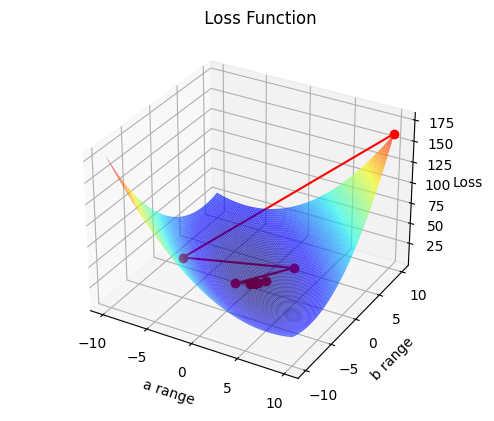

In [ ]:
plot_loss_3d()
plt.show()

Тепер побудуємо траєкторію вектора ваг в площині $W$

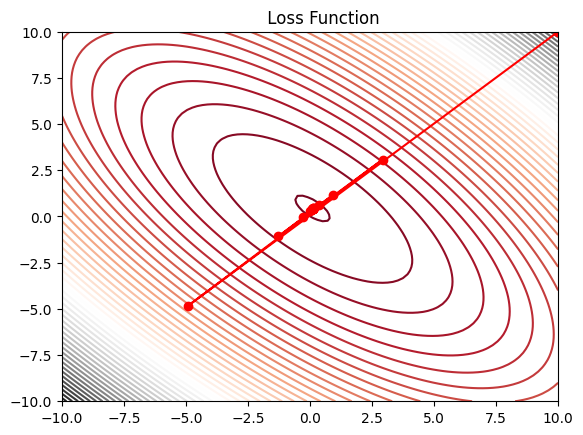

In [ ]:
plot_loss_2d()
plt.show()

## 3. Підбір $\eta_1$ та $\eta_2$ згідно з завданням

Як відомо з лекцій збіжність градієнтного спуску гарантується за умови $0 < \eta < \frac{2}{\lambda_{max}}$, де $\lambda_{max}$ - найбільше власне число матриці $R_x$. Обрахуємо значення $\lambda_{max}$:

$$
\text{det} R_x = 
\begin{vmatrix}
1 - \lambda & 0.7 \\
0.7 & 0.7 - \lambda
\end{vmatrix}
=
(1 - \lambda)(0.7 - \lambda) - 0.49 = 0.7 - 1.7 \lambda + \lambda^2 - 0.49 = \lambda^2 - 1.7 \lambda + 0.21 \quad \Rightarrow \quad \lambda_{1,2} = \frac{17 \pm \sqrt{205}}{20} \quad \Rightarrow \quad \lambda_{max} =  \frac{17 + \sqrt{205}}{20} \approx 1.56589
$$

Таким чином отримали, що в нашому випадку для того, щоб алгоритм збігався має виконуватись умова $0 < \eta <  \frac{17 + \sqrt{205}}{20}$. Тоді виберемо такі значення $\eta_1 = 0.5,  \eta_2 = 1.6$ 

## 3.1 Робота алгоритму зі швидкістю навчання $\eta_1$

In [ ]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 10] , eps = 1e-4, learning_rate = 0.5, n = 6)

,x,y,function
0,10,10,161.000050000000
1,1.700000,1.750000,3.50380001020730
2,0.437500,0.530000,-0.0414843984961510
3,0.233250,0.361875,-0.122422819585338
4,0.189969,0.349300,-0.125088922720563
5,0.172729,0.358161,-0.125759447933173
6,0.161008,0.368625,-0.126215617235064
7,0.151485,0.377960,-0.126544585777924
8,0.143457,0.385960,-0.126782213786761
9,0.136642,0.392770,-0.126953931066169


час виконання в секундах:  0.2512


Як бачимо алгоритм виконався за більшу кількість ітерацій ніж у випадку, коли $\eta = 0.9$. Тепер побудуємо траєкторію вектора ваг в тривимірному просторі і в площині $W$

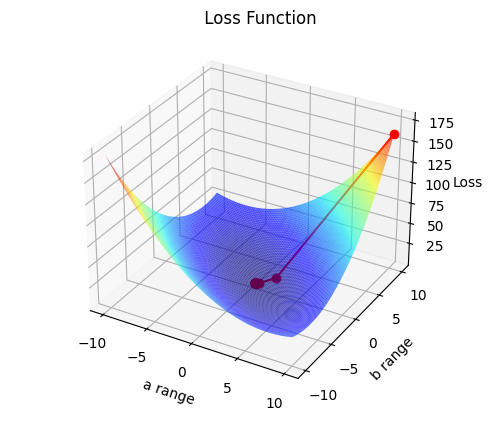

In [ ]:
plot_loss_3d()

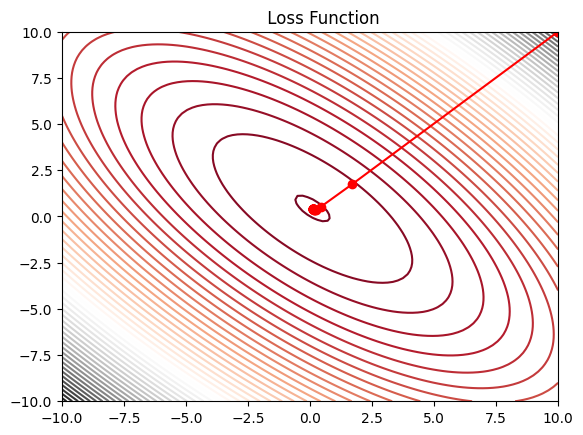

In [ ]:
plot_loss_2d()
plt.show()

## 3.2 Робота алгоритму зі швидкістю навчання $\eta_2$

In [ ]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 10] , eps = 1e-4, learning_rate = 1.6, n = 7, max_iter = 10000)

,x,y,function
0,10,10,161.000050000000
1,-16.5600000,-16.4000000,476.529649935722
2,28.9440000,29.1872000,1410.00876155021
3,-49.4160640,-49.1296000,4171.61778531407
4,85.3147904,85.6237517,12341.5631163565
...,...,...,...
9997,-3.68326368815769e+2355,-3.68326368815769e+2355,2.30629333740517e+4711
9998,6.33521354363123e+2355,6.33521354363123e+2355,6.82293820937946e+4711
9999,-1.08965672950457e+2356,-1.08965672950457e+2356,2.01849803986281e+4712
10000,1.87420957474786e+2356,1.87420957474786e+2356,5.97152460113014e+4712


час виконання в секундах:  62.4362


Бачимо що алгоритм - розбіжний при $\eta = \eta_2$, спробуємо побудувати траекторію вектора ваг в тривимірному просторі і в площині $W$. Але спочатку зменшимо значення max_iter до 23, для кращої візуалізації.

In [ ]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 10] , eps = 1e-4, learning_rate = 1.6, n = 7, max_iter = 23)

,x,y,function
0,10,10,161.000050000000
1,-16.5600000,-16.4000000,476.529649935722
2,28.9440000,29.1872000,1410.00876155021
3,-49.4160640,-49.1296000,4171.61778531407
4,85.3147904,85.6237517,12341.5631163565
5,-146.4474761,-146.1268163,36511.5297042852
6,252.1705199,252.4972630,108015.958933538
7,-433.4592465,-433.1293401,319554.662414135
8,745.8204088,746.1519601,945370.762711655
9,-1282.5424406,-1282.2100339,2796785.11389794


час виконання в секундах:  0.1379


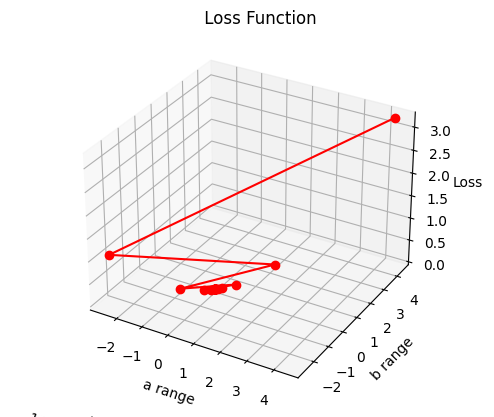

In [ ]:
plot_loss_3d()

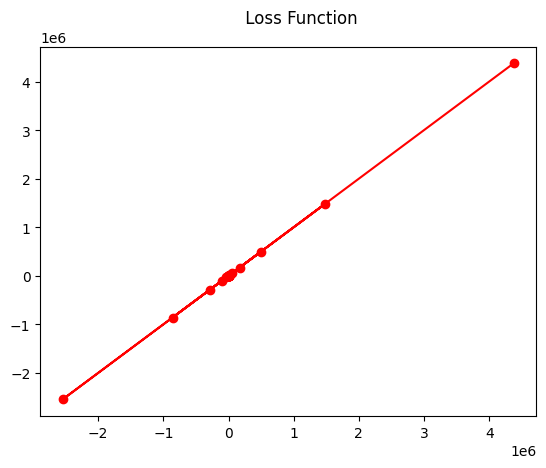

In [ ]:
plot_loss_2d()
plt.show()

# Висновок

У ході даної лабораторної роботи було розроблено програму, яка реалізує алгоритм градієнтного спуску. Спочатку було аналітично знайдено значення вектору $w^*$ для заданої функції. Потім був реалізований алгоритм градієнтного спуску та візуалізовано тарєкторію вектору ваг в тривимірному просторі і в площині $W$. Були підібрані такі швидкості навчання $\eta_1$ та $\eta_2$ при яких алгоритм, відповідно, збігається та розбігається